# Game Sales Dataset

Data analysis applied to game sales, version 1. Source: https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset

In [1]:
# Import all the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import warnings
from src.loader import GameSalesLoader
from src.datamanager import DataManager

Now we are loading the dataset using Pandas. With the 'Name' value as a reference, we can look for a particular game title in order to display related data. Then we perform data analysis methods on this database.

In [2]:
df = pd.read_csv('./Video_Games_Sales_as_at_22_Dec_2016.csv')
main = 'Name'
dataman = DataManager(df, main)

Let's check for some random games within this database!

In [3]:
print("Sample of 5 random games:")
dataman.show_sample(5)

Sample of 5 random games:


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
8118,Metal Gear Ac!d 2,PSP,2005.0,Strategy,Konami Digital Entertainment,0.11,0.00,0.05,0.01,0.18,NaN,NaN,NaN,NaN,NaN,NaN
13255,Strikers 1945,SAT,1996.0,Shooter,Atlus,0.00,0.00,0.05,0.00,0.05,NaN,NaN,NaN,NaN,NaN,NaN
3980,Major League Baseball 2K12,X360,2012.0,Sports,Take-Two Interactive,0.47,0.00,0.00,0.03,0.50,68.0,19.0,6.4,22.0,Visual Concepts,E
809,Mario Sports Mix,Wii,2010.0,Sports,Nintendo,0.88,0.44,0.63,0.12,2.08,64.0,54.0,7.1,34.0,Square Enix,E
10694,Zero4 Champ RR-Z,SNES,1995.0,Racing,Media Rings,0.00,0.00,0.10,0.00,0.10,NaN,NaN,NaN,NaN,NaN,NaN


Let's check our game title search. First we are picking 5 random game titles, then, we check a recurrent title for different platforms. In advance, we display statistical data of sales for different regions.

In [4]:
print("Title of 5 random games:")
dataman.show_titles(5)

Title of 5 random games:


15385                      Paragon
15176           Bomberman Story DS
5735     Sonic Boom: Rise of Lyric
7307                           NBA
513                  Mortal Kombat
Name: Name, dtype: object

In [5]:
print("A common title for different platforms:")
dataman.show_same_title('Grand Theft Auto V')


A common title for different platforms:


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M
42,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97.0,66.0,8.3,2899.0,Rockstar North,M
165,Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,2.81,2.19,0.00,0.47,5.48,97.0,14.0,7.9,764.0,Rockstar North,M
1730,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.39,0.69,0.00,0.09,1.17,96.0,57.0,7.9,3756.0,Rockstar North,M


In [6]:
print("Statistics of sales per region:")
dataman.describe_some_data(['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales'])

Statistics of sales per region:


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16719.000000,16719.000000,16719.000000,16719.000000
mean,0.263330,0.145025,0.077602,0.047332
std,0.813514,0.503283,0.308818,0.186710
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.030000
max,41.360000,28.960000,10.220000,10.570000


After performing searches and displaying sales statistics, we display the number of games per platform: the platforms with more games released were the Playstation 2, a traditional videogame released by Sony in the 2000's, followed by Nintendo DS, a handheld that serves as a sucessor of Gameboy Advance.

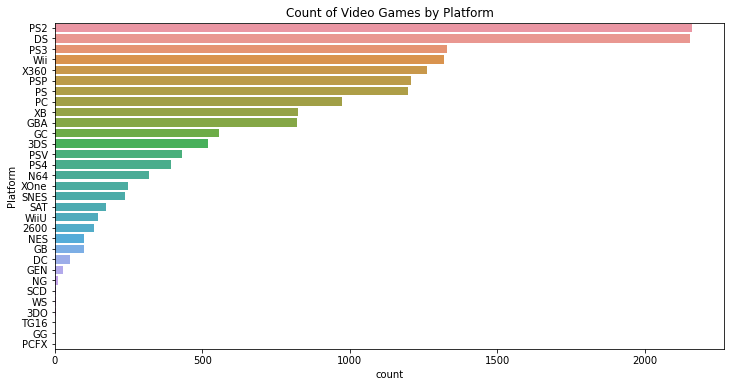

In [7]:
dataman.plot_counts('Platform', "Count of Video Games by Platform")

The next plot present the number of games released by genre. Action games have more games released, followed by Sport games.

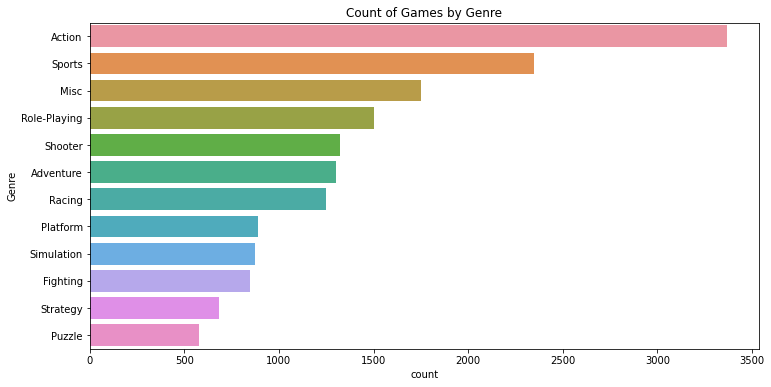

In [8]:
dataman.plot_counts('Genre', "Count of Games by Genre")

The next plot presents the number of games released by rating audience, which is the grade related to the minimum recommended age to play a given game title.

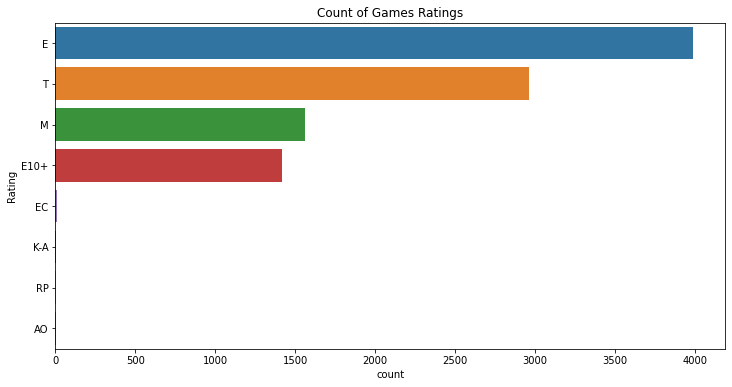

In [9]:
dataman.plot_counts('Rating', "Count of Games Ratings")

The next plot presents the number of games released by a given developer or publisher. Note that Ubisoft and EA are in the top, followed by Japanese companies Konami and Capcom.

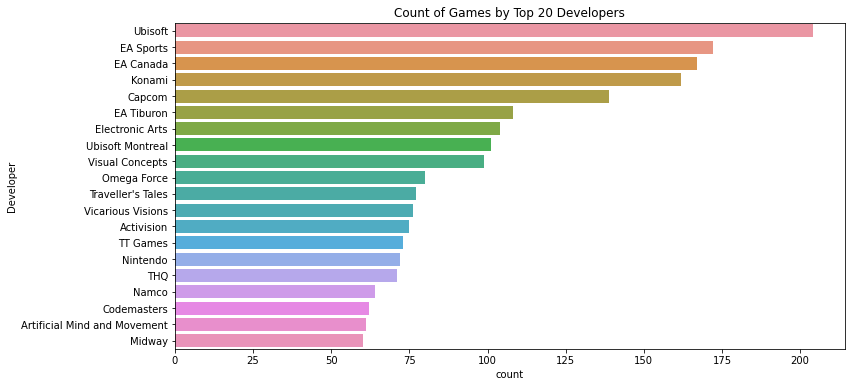

In [10]:
dataman.plot_counts_top_n('Developer', "Count of Games by Top 20 Developers")

The following plot presents the number of games released during a given year.

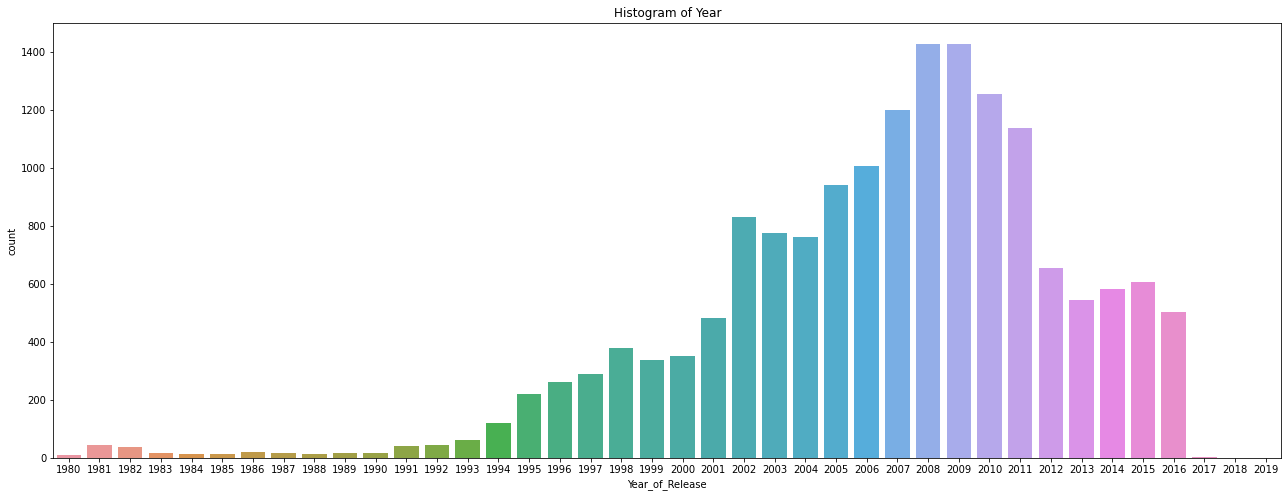

In [11]:
dataman.plot_histogram('Year_of_Release',"Histogram of Year")

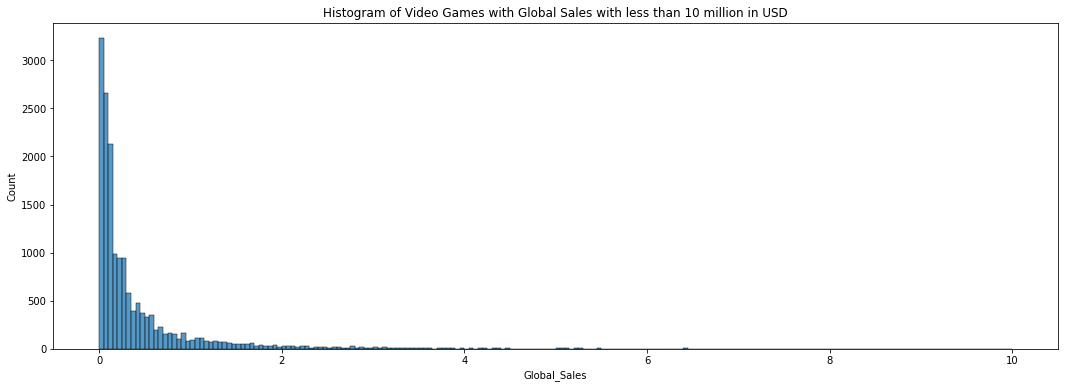

In [12]:

dataman.plot_histogram_with_range('Global_Sales', "Histogram of Video Games with Global Sales with less than 10 million in USD")

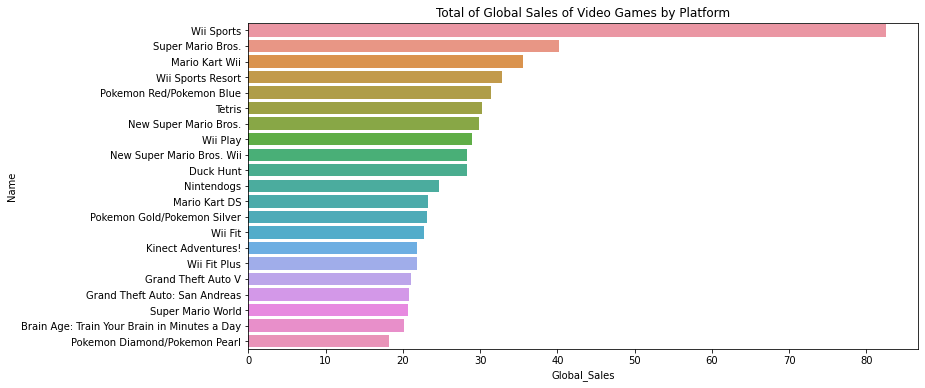

In [13]:
dataman.plot_data_per_variable('Global_Sales', "Total of Global Sales of Video Games by Platform")

/home/guicostas/.local/lib/python3.10/site-packages/seaborn/distributions.py:385: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


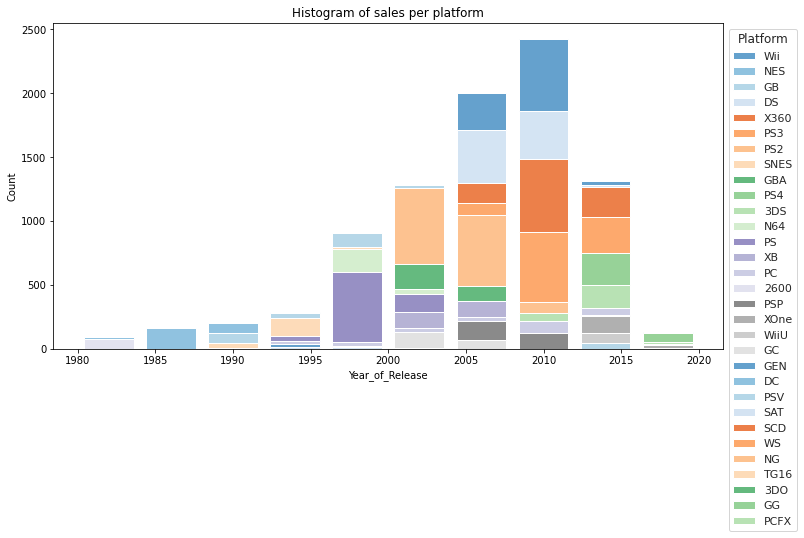

In [14]:
dataman.plot_stacked_bar('Year_of_Release', 'Platform', 'Global_Sales', 'Histogram of sales per platform')

/home/guicostas/.local/lib/python3.10/site-packages/seaborn/distributions.py:385: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


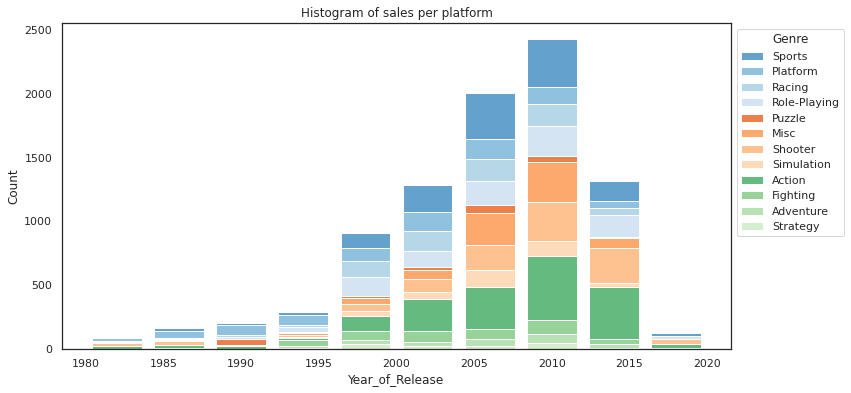

In [15]:
dataman.plot_stacked_bar('Year_of_Release', 'Genre', 'Global_Sales', 'Histogram of sales per platform')

Further plots present some platform related sales, reporting the 10 most sold games for each platform.

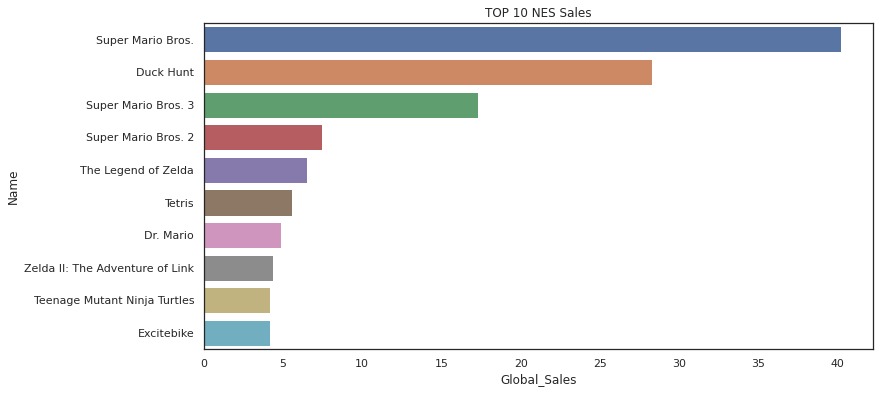

In [16]:
dataman.plot_data_per_variable_filtering('Global_Sales', 'Platform', 'NES', 'TOP 10 NES Sales', 10)

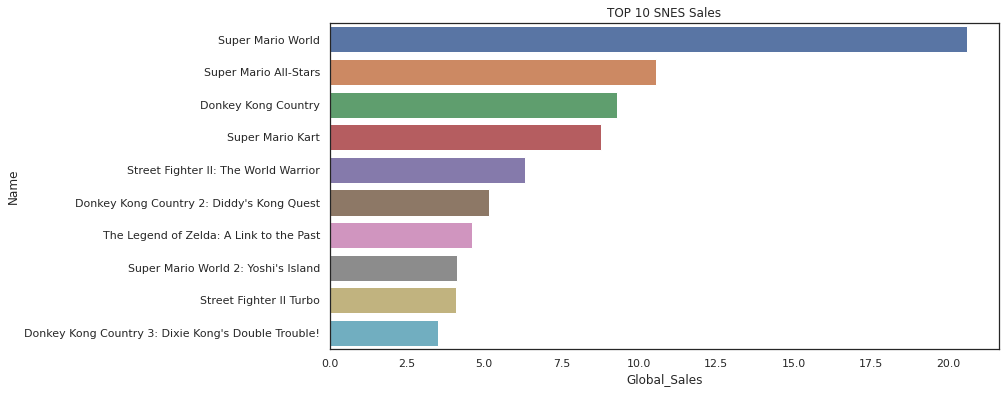

In [17]:
dataman.plot_data_per_variable_filtering('Global_Sales', 'Platform', 'SNES', 'TOP 10 SNES Sales', 10)

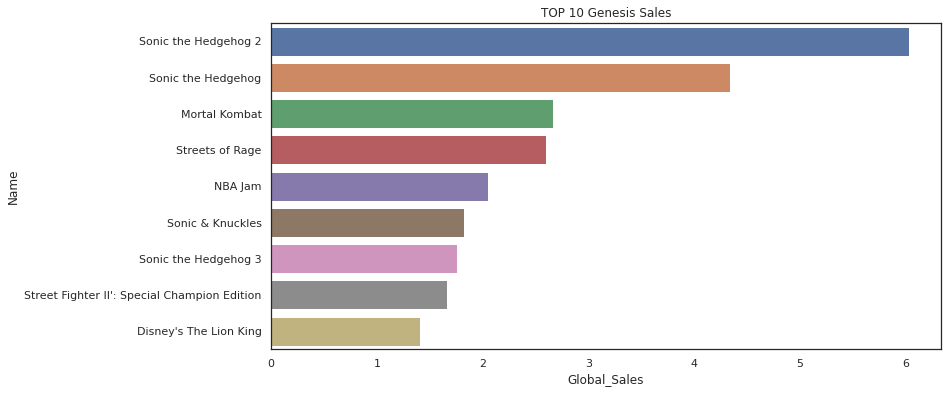

In [18]:
dataman.plot_data_per_variable_filtering('Global_Sales', 'Platform', 'GEN', 'TOP 10 Genesis Sales', 10)

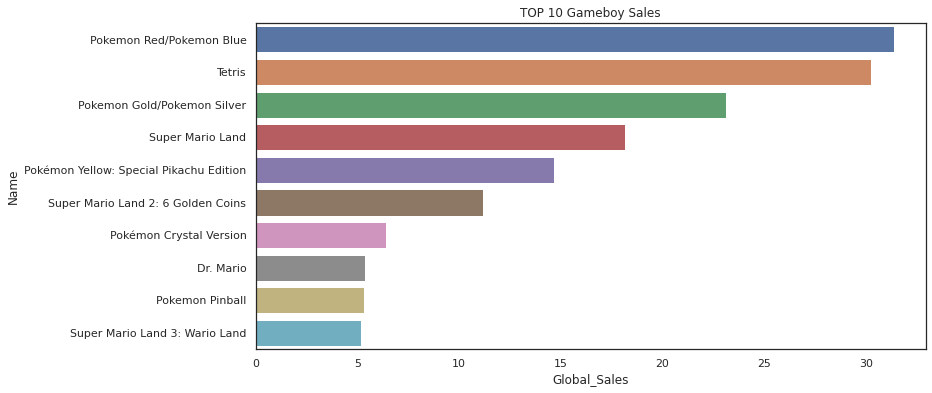

In [19]:
dataman.plot_data_per_variable_filtering('Global_Sales', 'Platform', 'GB', 'TOP 10 Gameboy Sales', 10)

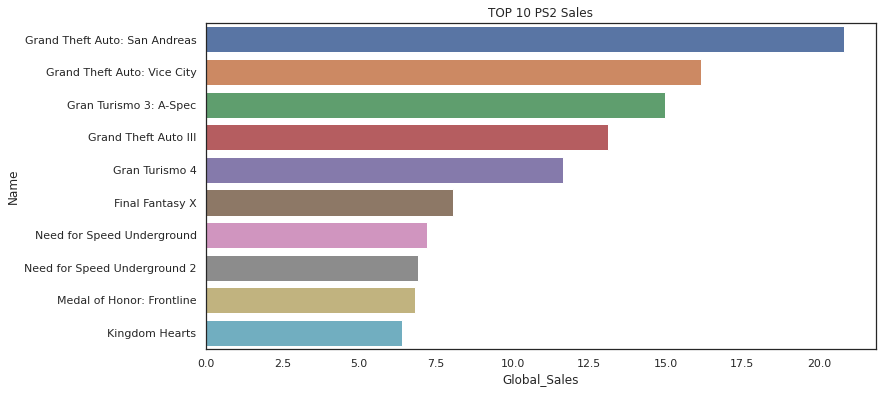

In [20]:
dataman.plot_data_per_variable_filtering('Global_Sales', 'Platform', 'PS2', 'TOP 10 PS2 Sales', 10)

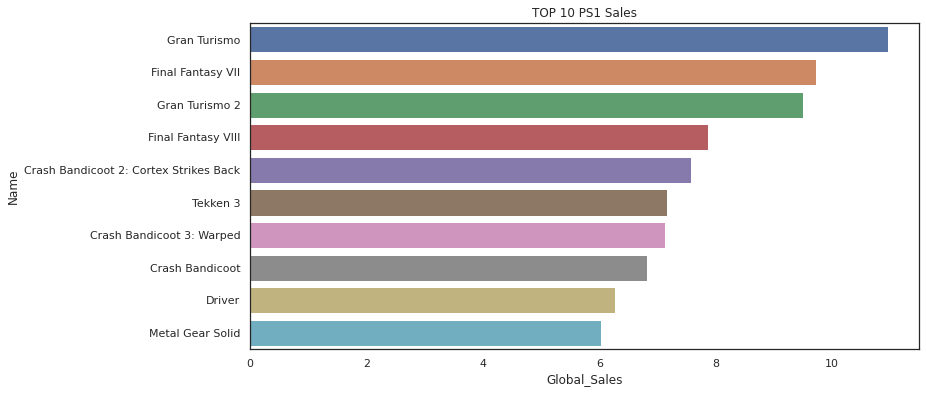

In [21]:
dataman.plot_data_per_variable_filtering('Global_Sales', 'Platform', 'PS', 'TOP 10 PS1 Sales', 10)

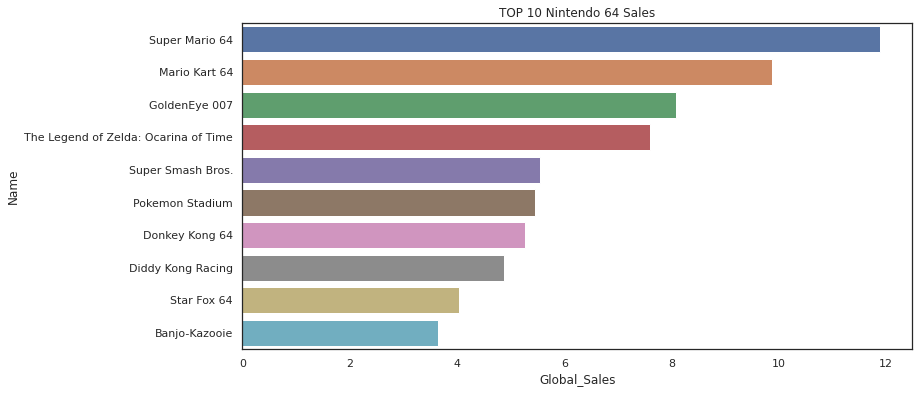

In [22]:
dataman.plot_data_per_variable_filtering('Global_Sales', 'Platform', 'N64', 'TOP 10 Nintendo 64 Sales', 10)

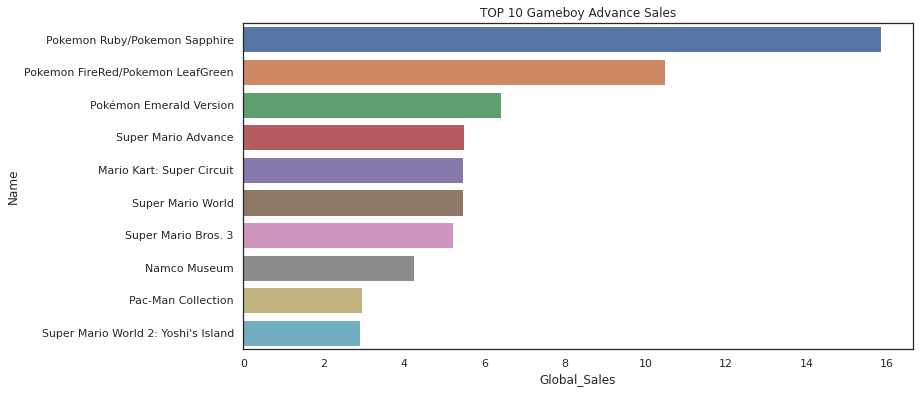

In [23]:
dataman.plot_data_per_variable_filtering('Global_Sales', 'Platform', 'GBA', 'TOP 10 Gameboy Advance Sales', 10)

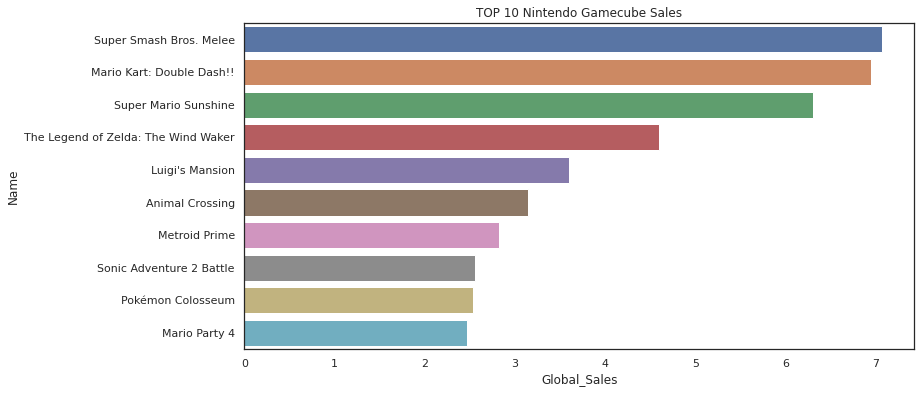

In [24]:
dataman.plot_data_per_variable_filtering('Global_Sales', 'Platform', 'GC', 'TOP 10 Nintendo Gamecube Sales', 10)

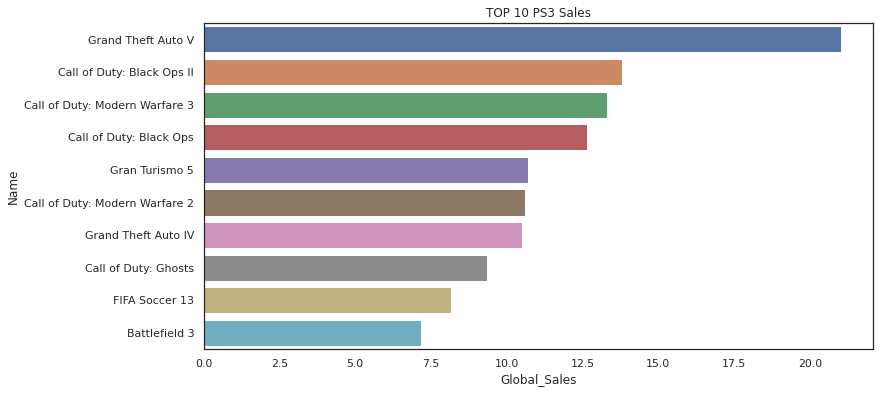

In [25]:
dataman.plot_data_per_variable_filtering('Global_Sales', 'Platform', 'PS3', 'TOP 10 PS3 Sales', 10)

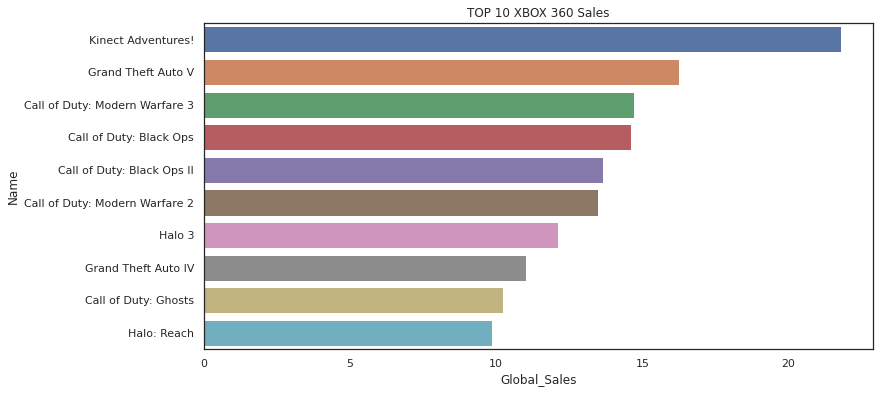

In [26]:
dataman.plot_data_per_variable_filtering('Global_Sales', 'Platform', 'X360', 'TOP 10 XBOX 360 Sales', 10)

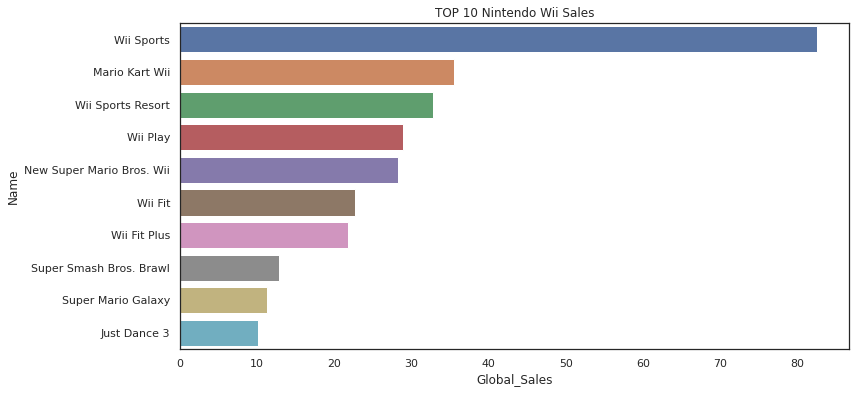

In [27]:
dataman.plot_data_per_variable_filtering('Global_Sales', 'Platform', 'Wii', 'TOP 10 Nintendo Wii Sales', 10)

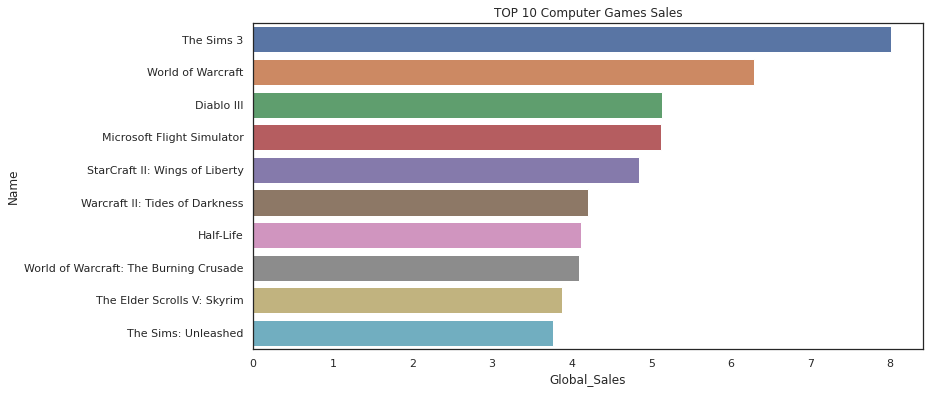

In [28]:
dataman.plot_data_per_variable_filtering('Global_Sales', 'Platform', 'PC', 'TOP 10 Computer Games Sales', 10)

After presenting most sold games for some platforms, we present interesting data regarding global sales per developer, genre or platform.

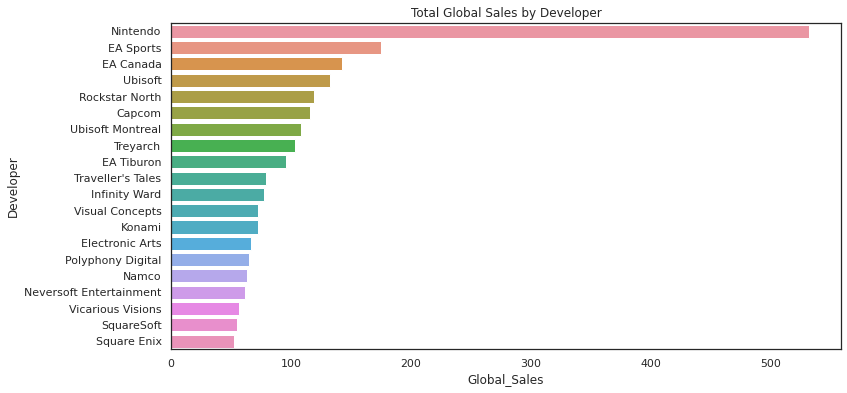

In [29]:
dataman.plot_data_per_variable_grouping('Global_Sales', 'Developer', 'Total Global Sales by Developer')

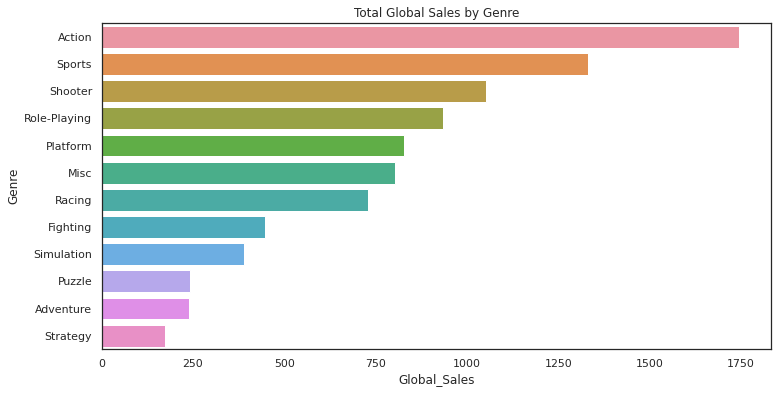

In [30]:
dataman.plot_data_per_variable_grouping('Global_Sales', 'Genre', 'Total Global Sales by Genre')

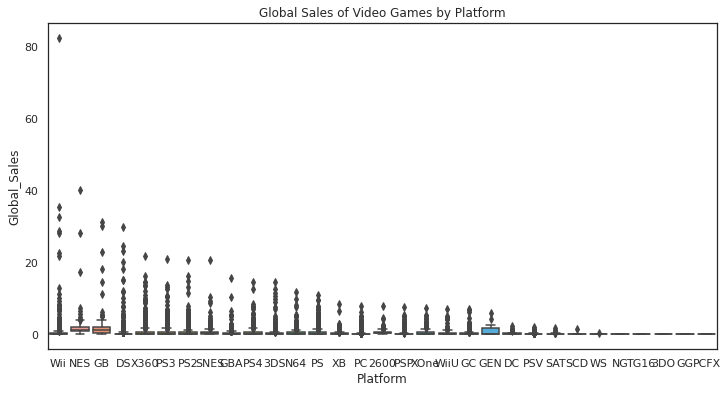

In [31]:
dataman.plot_data_box('Platform','Global_Sales', 'Global Sales of Video Games by Platform')

Here we present some common games to different platforms.

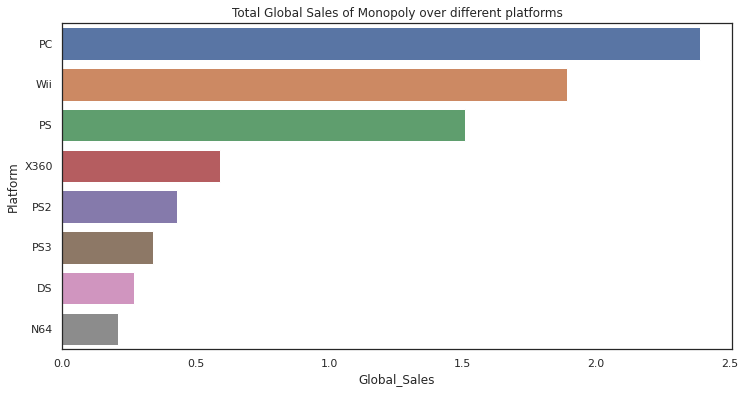

In [32]:
dataman.plot_sales_same_game('Monopoly')

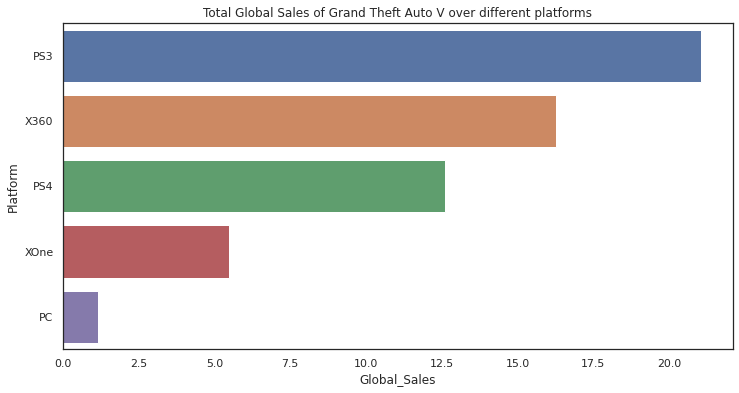

In [33]:
dataman.plot_sales_same_game('Grand Theft Auto V')

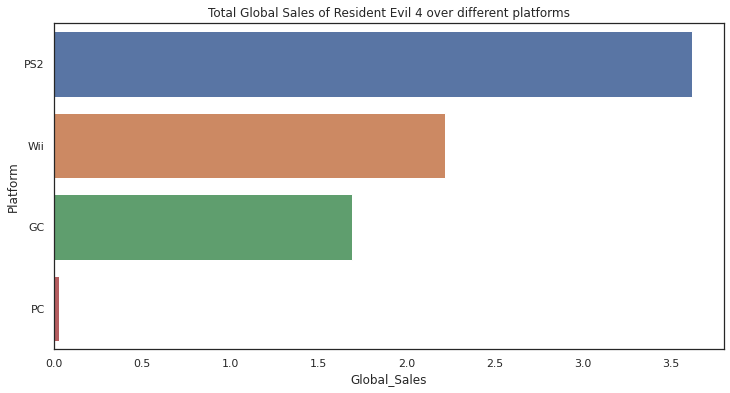

In [34]:
dataman.plot_sales_same_game('Resident Evil 4')

Finally, we present some the percent of relevant data based on global sales among each type.

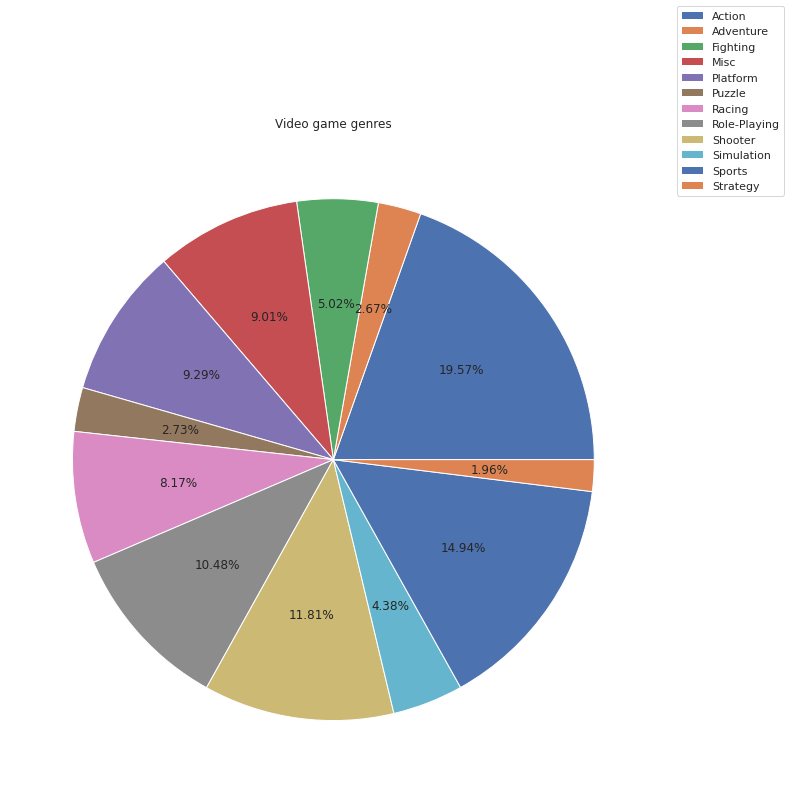

In [35]:
dataman.plot_pie('Genre', 'Global_Sales', "Video game genres")

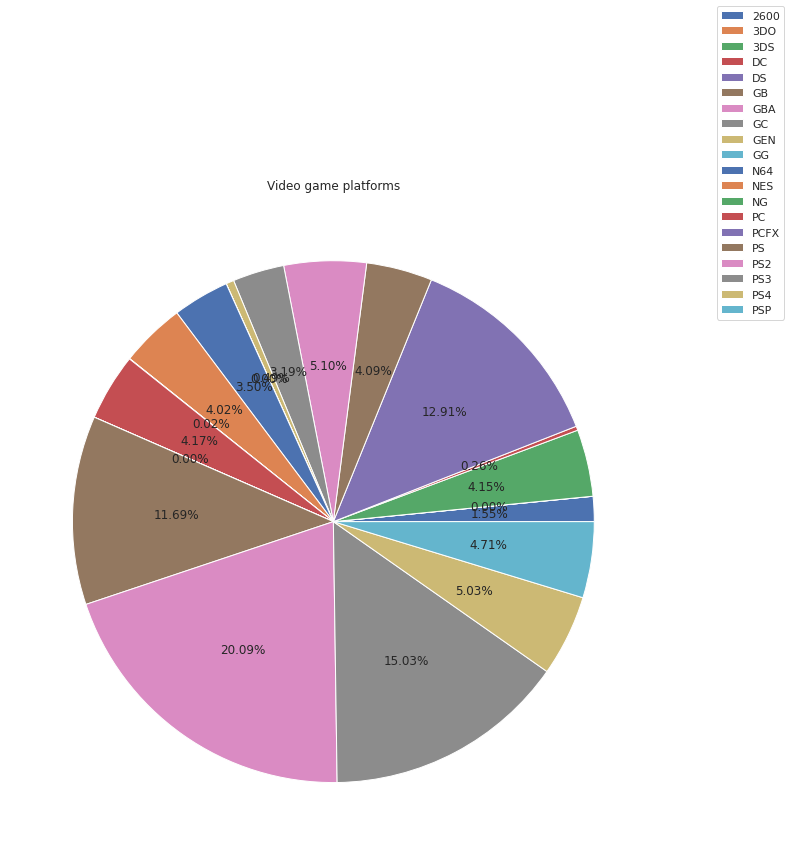

In [36]:
dataman.plot_pie('Platform', 'Global_Sales', "Video game platforms")

This is a sample presentation of Game Sales study with some concepts of data analysis applied to it, displaying some interesting information regarding game sales of each period.